# Cricket Player Performance

## Import libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### >> We are working on combined dataset of both bowling and batting statistics of Indian players from World Cup 2019.
### >> Hence, we will analyse the performance of players during the World Cup 2019

In [2]:
dataset=pd.read_csv("C:\mahua\Projects\Internsavy\World_Cup_2019_Player_Stats.csv")

In [3]:
dataset

,Player,Mat,Bat_Inn,Bowl_Inn,Not_Out,Runs,BF,HS,SR,100,...,4s,6s,O_Bowled,Wkts_Taken,Catches,Runs_Conceded,Bowl_Avg,Bat_Avg,Wkt-5,Maidens
0,B Kumar,6,2,6.0,0,2,4,2,50.00,NaN,...,0,0,51.4,10.0,1.0,269.0,26.90,1.00,NaN,1.0
1,H Pandya,9,9,9.0,2,226,201,48,112.43,NaN,...,21,4,79.0,10.0,3.0,447.0,44.70,32.28,NaN,1.0
2,J Bumrah,9,3,9.0,3,1,1,1/,100.00,NaN,...,0,0,84.0,18.0,1.0,371.0,20.61,NaN,NaN,9.0
3,K Jadhav,6,5,3.0,3,80,99,52,80.80,NaN,...,6,1,6.0,0.0,4.0,34.0,NaN,40.00,NaN,NaN
4,K Yadav,7,2,7.0,2,1,2,1/,50.00,NaN,...,0,0,67.0,6.0,NaN,337.0,56.16,NaN,NaN,2.0
5,KD Karthik,3,2,NaN,0,14,34,8,41.17,NaN,...,2,0,NaN,NaN,3.0,NaN,NaN,7.00,NaN,NaN
6,KL Rahul,9,9,NaN,1,361,466,111,77.46,1.0,...,31,5,NaN,NaN,1.0,NaN,NaN,45.12,NaN,NaN
7,M Shami,4,3,4.0,0,2,6,1,33.33,NaN,...,0,0,35.1,14.0,3.0,193.0,13.78,0.66,1.0,2.0
8,MS Dhoni,9,8,NaN,2,273,311,56/,87.78,NaN,...,20,5,NaN,NaN,7.0,NaN,NaN,45.50,NaN,NaN
9,R Jadeja,2,1,2.0,0,77,59,77,130.50,NaN,...,4,4,20.0,2.0,3.0,74.0,37.00,77.00,NaN,NaN


In [4]:
dataset.head()

,Player,Mat,Bat_Inn,Bowl_Inn,Not_Out,Runs,BF,HS,SR,100,...,4s,6s,O_Bowled,Wkts_Taken,Catches,Runs_Conceded,Bowl_Avg,Bat_Avg,Wkt-5,Maidens
0,B Kumar,6,2,6.0,0,2,4,2,50.00,NaN,...,0,0,51.4,10.0,1.0,269.0,26.90,1.00,NaN,1.0
1,H Pandya,9,9,9.0,2,226,201,48,112.43,NaN,...,21,4,79.0,10.0,3.0,447.0,44.70,32.28,NaN,1.0
2,J Bumrah,9,3,9.0,3,1,1,1/,100.00,NaN,...,0,0,84.0,18.0,1.0,371.0,20.61,NaN,NaN,9.0
3,K Jadhav,6,5,3.0,3,80,99,52,80.80,NaN,...,6,1,6.0,0.0,4.0,34.0,NaN,40.00,NaN,NaN
4,K Yadav,7,2,7.0,2,1,2,1/,50.00,NaN,...,0,0,67.0,6.0,NaN,337.0,56.16,NaN,NaN,2.0


In [5]:
dataset.tail()

,Player,Mat,Bat_Inn,Bowl_Inn,Not_Out,Runs,BF,HS,SR,100,...,4s,6s,O_Bowled,Wkts_Taken,Catches,Runs_Conceded,Bowl_Avg,Bat_Avg,Wkt-5,Maidens
11,R Sharma,9,9,NaN,1,648,659,140,98.33,5.0,...,67,14,NaN,NaN,4.0,NaN,NaN,81.00,NaN,NaN
12,S Dhawan,2,2,NaN,0,125,121,117,103.30,1.0,...,17,0,NaN,NaN,NaN,NaN,NaN,62.50,NaN,NaN
13,V Kohli,9,9,NaN,1,443,471,82,94.05,NaN,...,38,2,NaN,NaN,6.0,NaN,NaN,55.37,NaN,NaN
14,V Shankar,3,3,1.0,1,58,75,29,77.33,NaN,...,6,0,5.2,2.0,2.0,22.0,11.00,29.00,NaN,NaN
15,Y Chahal,8,1,8.0,0,5,5,5,100.00,NaN,...,1,0,74.0,12.0,4.0,442.0,36.83,5.00,NaN,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         16 non-null     object 
 1   Mat            16 non-null     int64  
 2   Bat_Inn        16 non-null     int64  
 3   Bowl_Inn       9 non-null      float64
 4   Not_Out        16 non-null     int64  
 5   Runs           16 non-null     int64  
 6   BF             16 non-null     int64  
 7   HS             16 non-null     object 
 8   SR             16 non-null     float64
 9   100            3 non-null      float64
 10  50             6 non-null      float64
 11  0              4 non-null      float64
 12  4s             16 non-null     int64  
 13  6s             16 non-null     int64  
 14  O_Bowled       9 non-null      float64
 15  Wkts_Taken     9 non-null      float64
 16  Catches        14 non-null     float64
 17  Runs_Conceded  9 non-null      float64
 18  Bowl_Avg    

In [7]:
dataset.describe()

,Mat,Bat_Inn,Bowl_Inn,Not_Out,Runs,BF,SR,100,50,0,4s,6s,O_Bowled,Wkts_Taken,Catches,Runs_Conceded,Bowl_Avg,Bat_Avg,Wkt-5,Maidens
count,16.000000,16.000000,9.000000,16.000000,16.000000,16.000000,16.000000,3.000000,6.000000,4.0,16.00000,16.000000,9.000000,9.000000,14.000000,9.000000,8.000000,14.000000,1.0,5.000000
mean,6.187500,4.500000,5.444444,1.000000,152.000000,165.250000,82.856875,2.333333,2.000000,1.0,14.25000,2.250000,46.855556,8.222222,3.071429,243.222222,30.872500,36.459286,1.0,3.000000
std,2.786126,3.162278,3.045944,1.095445,191.035773,204.151088,27.072062,2.309401,1.549193,0.0,18.42643,3.678768,31.304996,6.119187,1.859044,169.814441,15.638163,26.829479,NaN,3.391165
min,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,33.330000,1.000000,1.000000,1.0,0.00000,0.000000,5.200000,0.000000,1.000000,22.000000,11.000000,0.660000,1.0,1.000000
25%,3.750000,2.000000,3.000000,0.000000,4.250000,5.750000,70.497500,1.000000,1.000000,1.0,0.75000,0.000000,20.000000,2.000000,1.250000,74.000000,18.902500,12.500000,1.0,1.000000
50%,6.500000,3.000000,6.000000,1.000000,78.500000,87.000000,88.505000,1.000000,1.500000,1.0,6.00000,0.500000,51.400000,10.000000,3.000000,269.000000,31.865000,36.140000,1.0,2.000000
75%,9.000000,8.250000,8.000000,2.000000,237.750000,228.500000,100.000000,3.000000,2.000000,1.0,20.25000,4.000000,74.000000,12.000000,4.000000,371.000000,38.925000,52.902500,1.0,2.000000
max,9.000000,9.000000,9.000000,3.000000,648.000000,659.000000,130.500000,5.000000,5.000000,1.0,67.00000,14.000000,84.000000,18.000000,7.000000,447.000000,56.160000,81.000000,1.0,9.000000


### Data Pre-processing

In [8]:
dataset.isnull().any()

Player           False
Mat              False
Bat_Inn          False
Bowl_Inn          True
Not_Out          False
Runs             False
BF               False
HS               False
SR               False
100               True
50                True
0                 True
4s               False
6s               False
O_Bowled          True
Wkts_Taken        True
Catches           True
Runs_Conceded     True
Bowl_Avg          True
Bat_Avg           True
Wkt-5             True
Maidens           True
dtype: bool

In [9]:
dataset.isnull().sum()

Player            0
Mat               0
Bat_Inn           0
Bowl_Inn          7
Not_Out           0
Runs              0
BF                0
HS                0
SR                0
100              13
50               10
0                12
4s                0
6s                0
O_Bowled          7
Wkts_Taken        7
Catches           2
Runs_Conceded     7
Bowl_Avg          8
Bat_Avg           2
Wkt-5            15
Maidens          11
dtype: int64

In [10]:
dataset=dataset.replace(np.nan,0)

In [11]:
dataset

,Player,Mat,Bat_Inn,Bowl_Inn,Not_Out,Runs,BF,HS,SR,100,...,4s,6s,O_Bowled,Wkts_Taken,Catches,Runs_Conceded,Bowl_Avg,Bat_Avg,Wkt-5,Maidens
0,B Kumar,6,2,6.0,0,2,4,2,50.00,0.0,...,0,0,51.4,10.0,1.0,269.0,26.90,1.00,0.0,1.0
1,H Pandya,9,9,9.0,2,226,201,48,112.43,0.0,...,21,4,79.0,10.0,3.0,447.0,44.70,32.28,0.0,1.0
2,J Bumrah,9,3,9.0,3,1,1,1/,100.00,0.0,...,0,0,84.0,18.0,1.0,371.0,20.61,0.00,0.0,9.0
3,K Jadhav,6,5,3.0,3,80,99,52,80.80,0.0,...,6,1,6.0,0.0,4.0,34.0,0.00,40.00,0.0,0.0
4,K Yadav,7,2,7.0,2,1,2,1/,50.00,0.0,...,0,0,67.0,6.0,0.0,337.0,56.16,0.00,0.0,2.0
5,KD Karthik,3,2,0.0,0,14,34,8,41.17,0.0,...,2,0,0.0,0.0,3.0,0.0,0.00,7.00,0.0,0.0
6,KL Rahul,9,9,0.0,1,361,466,111,77.46,1.0,...,31,5,0.0,0.0,1.0,0.0,0.00,45.12,0.0,0.0
7,M Shami,4,3,4.0,0,2,6,1,33.33,0.0,...,0,0,35.1,14.0,3.0,193.0,13.78,0.66,1.0,2.0
8,MS Dhoni,9,8,0.0,2,273,311,56/,87.78,0.0,...,20,5,0.0,0.0,7.0,0.0,0.00,45.50,0.0,0.0
9,R Jadeja,2,1,2.0,0,77,59,77,130.50,0.0,...,4,4,20.0,2.0,3.0,74.0,37.00,77.00,0.0,0.0


In [12]:
dataset.isnull().sum()

Player           0
Mat              0
Bat_Inn          0
Bowl_Inn         0
Not_Out          0
Runs             0
BF               0
HS               0
SR               0
100              0
50               0
0                0
4s               0
6s               0
O_Bowled         0
Wkts_Taken       0
Catches          0
Runs_Conceded    0
Bowl_Avg         0
Bat_Avg          0
Wkt-5            0
Maidens          0
dtype: int64

#### >> Hence, after Pre-processing the data we have No Null values present

## Data Visualisation

### *From the Batting perspective*

### Players with most NOT OUT's

<Axes: xlabel='Player', ylabel='Not_Out'>

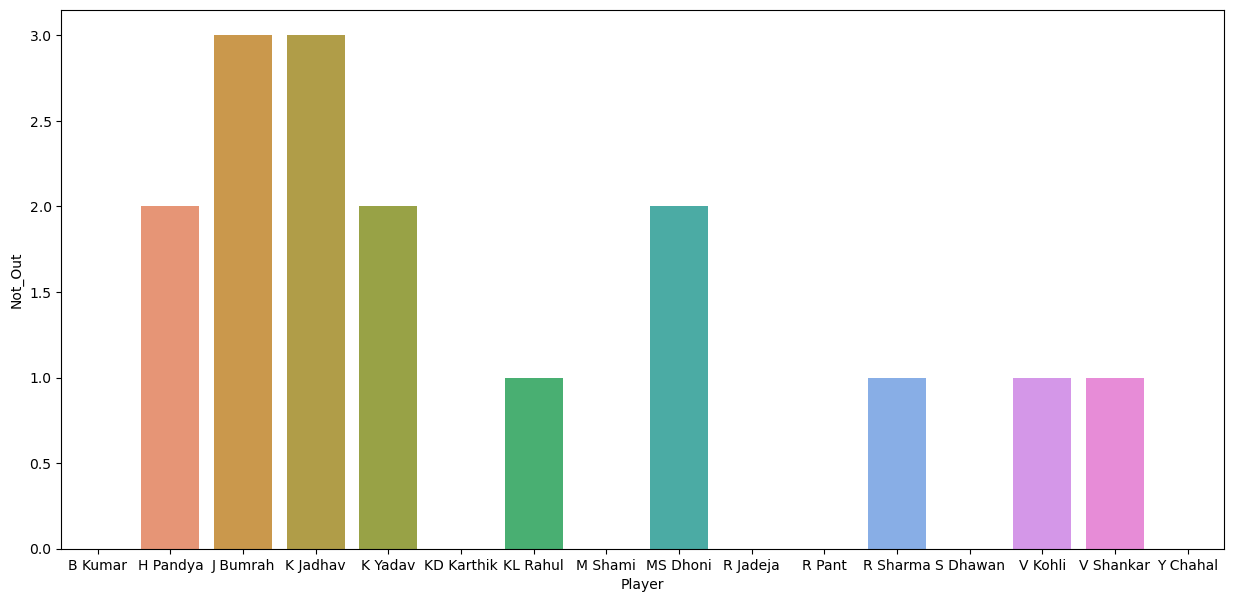

In [13]:
plt.figure(figsize=(15,7))
sns.barplot(data=dataset,x='Player',y='Not_Out')

### Players and Runs scored by them

<Axes: xlabel='Player', ylabel='Runs'>

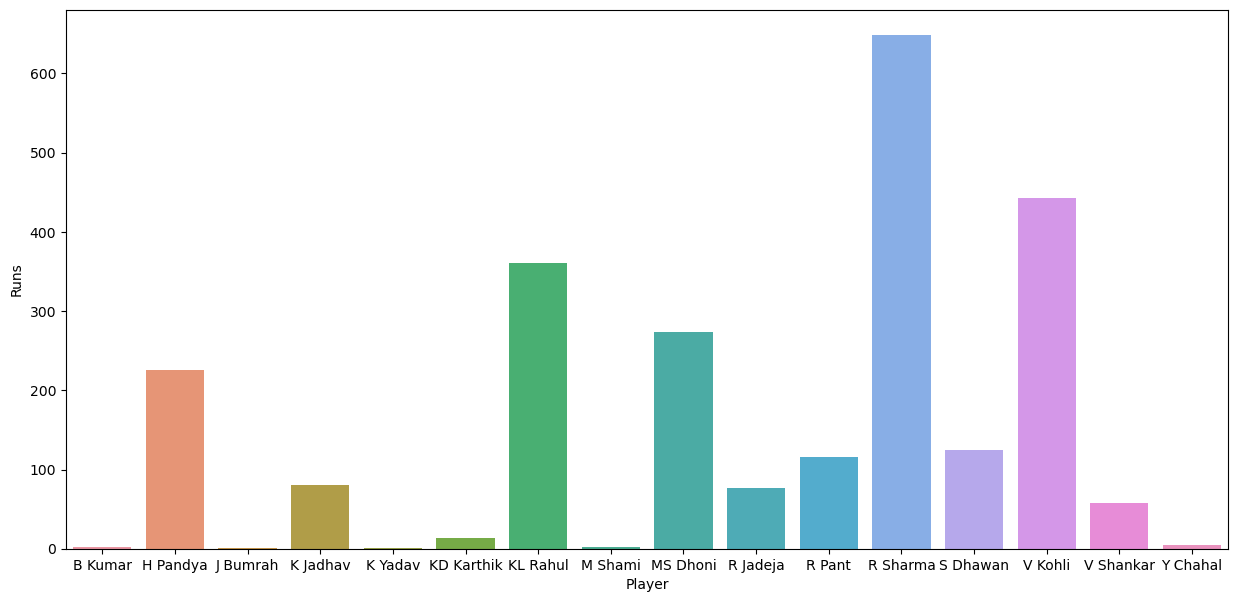

In [14]:
plt.figure(figsize=(15,7))
sns.barplot(data=dataset,x='Player',y='Runs')

In [15]:
dataset[dataset.Runs == dataset.Runs.max()]

,Player,Mat,Bat_Inn,Bowl_Inn,Not_Out,Runs,BF,HS,SR,100,...,4s,6s,O_Bowled,Wkts_Taken,Catches,Runs_Conceded,Bowl_Avg,Bat_Avg,Wkt-5,Maidens
11,R Sharma,9,9,0.0,1,648,659,140,98.33,5.0,...,67,14,0.0,0.0,4.0,0.0,0.0,81.0,0.0,0.0


#### >> Rohit Sharma was Highest Run scorer from India in World Cup 2019

### Players and their Strike Rate

<Axes: xlabel='Player', ylabel='SR'>

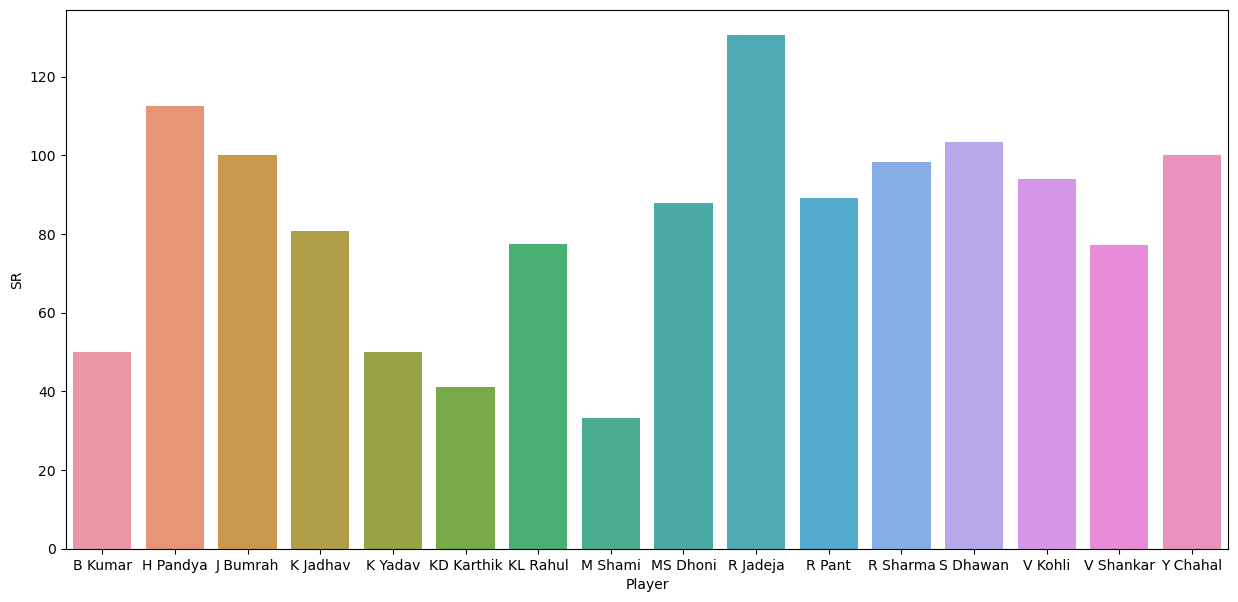

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(data=dataset,x='Player',y='SR')

In [17]:
dataset[dataset.SR == dataset.SR.max()]

,Player,Mat,Bat_Inn,Bowl_Inn,Not_Out,Runs,BF,HS,SR,100,...,4s,6s,O_Bowled,Wkts_Taken,Catches,Runs_Conceded,Bowl_Avg,Bat_Avg,Wkt-5,Maidens
9,R Jadeja,2,1,2.0,0,77,59,77,130.5,0.0,...,4,4,20.0,2.0,3.0,74.0,37.0,77.0,0.0,0.0


In [18]:
dataset[dataset.SR==dataset.SR.min()]

,Player,Mat,Bat_Inn,Bowl_Inn,Not_Out,Runs,BF,HS,SR,100,...,4s,6s,O_Bowled,Wkts_Taken,Catches,Runs_Conceded,Bowl_Avg,Bat_Avg,Wkt-5,Maidens
7,M Shami,4,3,4.0,0,2,6,1,33.33,0.0,...,0,0,35.1,14.0,3.0,193.0,13.78,0.66,1.0,2.0


#### >> Ravindra Jadeja had highest, whereas Mohammad Shami had lowest Strike Rate amongst all players

### Centuries scored

<Axes: xlabel='Player', ylabel='100'>

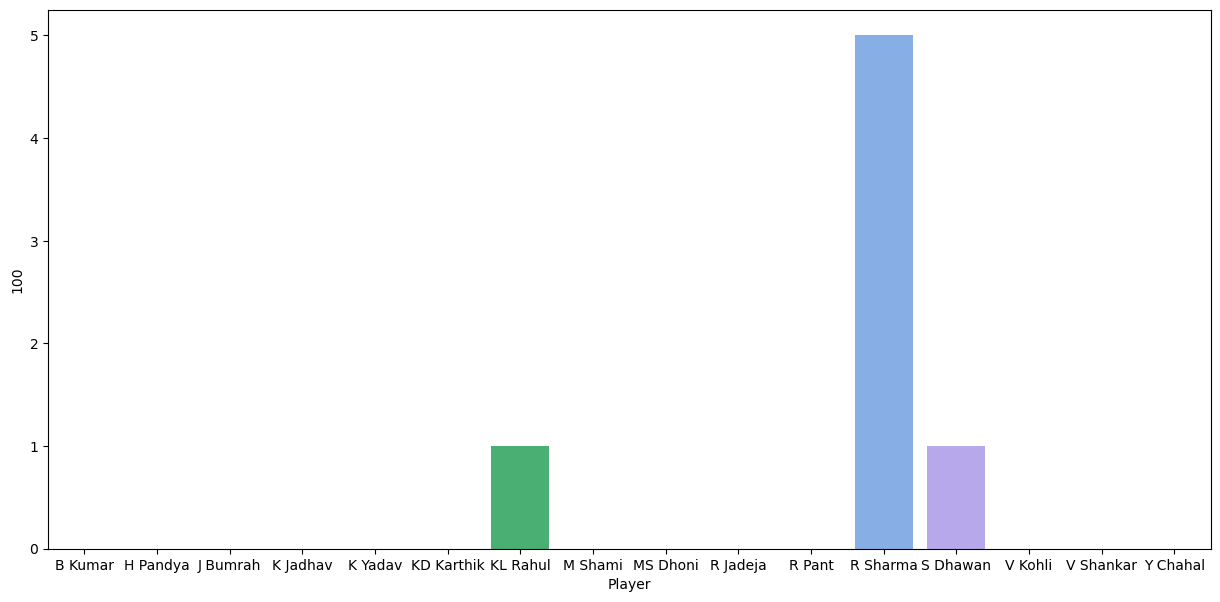

In [19]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='100',data=dataset)

#### >> Amongst all the Players, only 3 scored centuries. Rohit Sharma tops the list with 5 centuries in the championship.

### Half Centuries scored

<Axes: xlabel='Player', ylabel='50'>

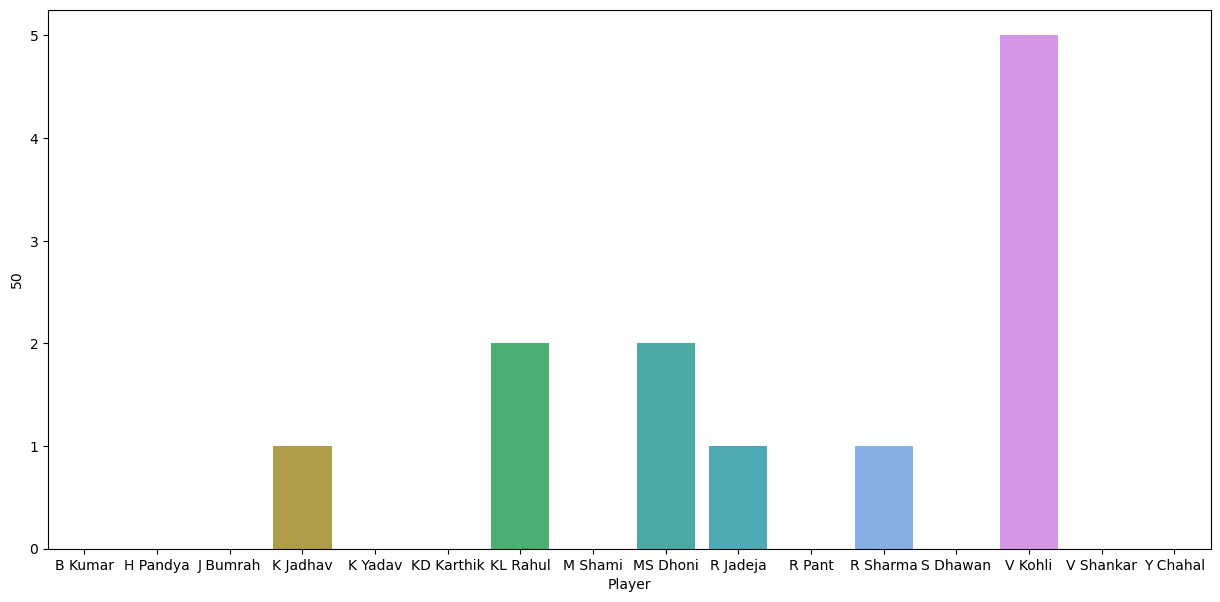

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='50',data=dataset)

#### >> Amongst all Virat Kohli had most Half-centuries (5). MS Dhoni and KL Rahul with 2 each. Kedar Jadhav and Ravindra Jadeja with 1 each.
#### >> Rohit Sharma has one half century as well.

### Players and Boundaries

Text(0.5, 1.0, 'Player-wise 4s in championship')

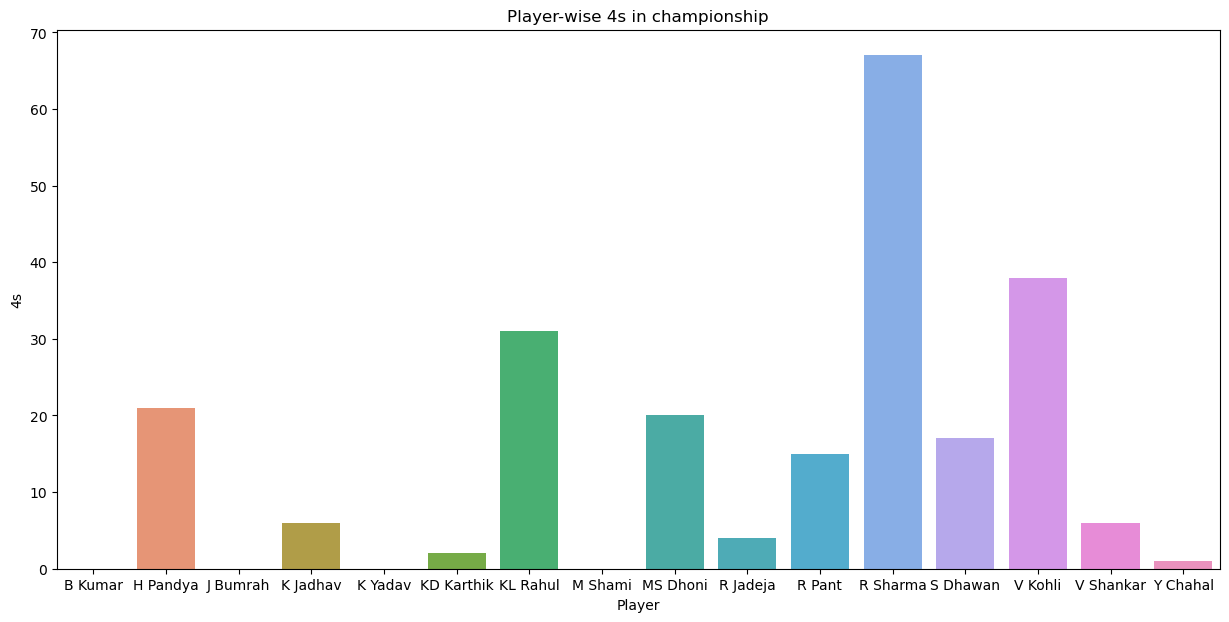

In [21]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='4s',data=dataset)
plt.title("Player-wise 4s in championship")

Text(0.5, 1.0, 'Player-wise 6s in championship')

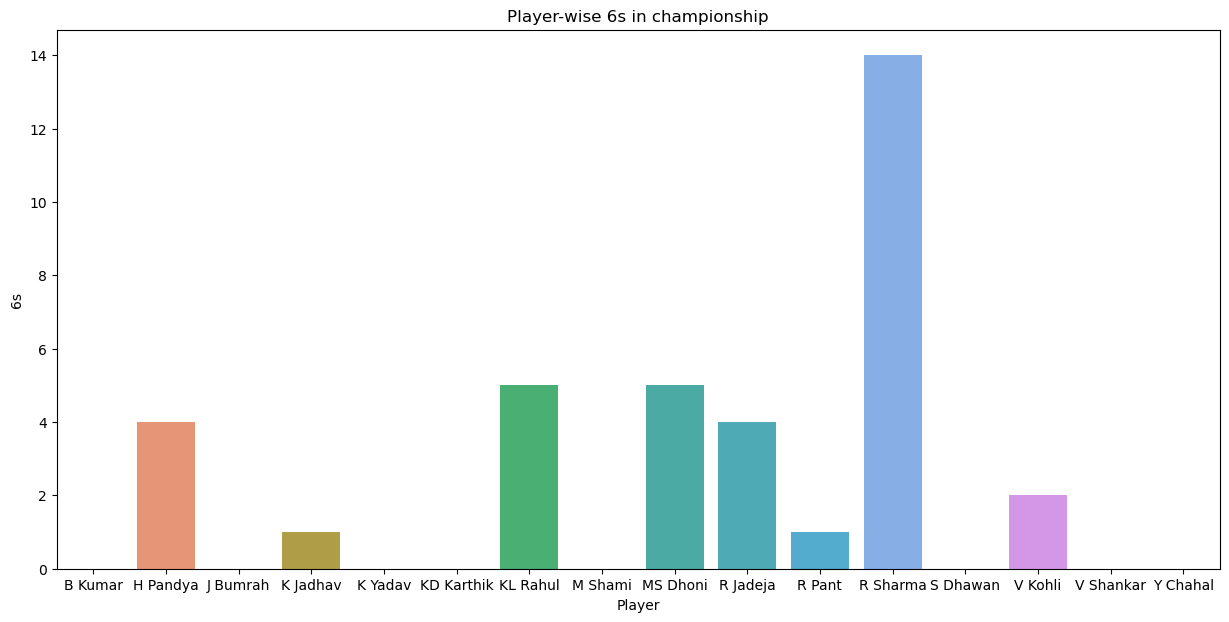

In [22]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='6s',data=dataset)
plt.title("Player-wise 6s in championship")

#### >> Rohit Sharma has both most 6s as well as 4s

### Players and their Batting Average

<Axes: xlabel='Player', ylabel='Bat_Avg'>

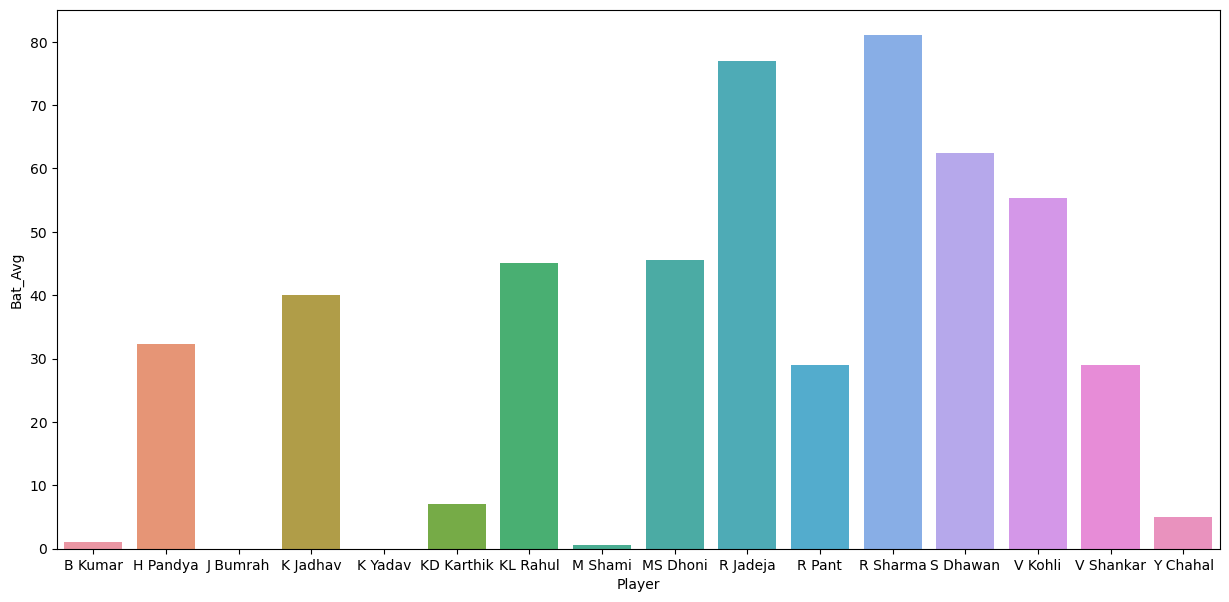

In [23]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='Bat_Avg',data=dataset)

#### >> Rohit Sharma has highest Batting Average. Ravindra Jadeja also has a High Batting Average of 77.00

### Players with Zeros in World Cup 2019

In [24]:
dataset[dataset['0']==dataset['0'].max()]

,Player,Mat,Bat_Inn,Bowl_Inn,Not_Out,Runs,BF,HS,SR,100,...,4s,6s,O_Bowled,Wkts_Taken,Catches,Runs_Conceded,Bowl_Avg,Bat_Avg,Wkt-5,Maidens
0,B Kumar,6,2,6.0,0,2,4,2,50.00,0.0,...,0,0,51.4,10.0,1.0,269.0,26.90,1.00,0.0,1.0
1,H Pandya,9,9,9.0,2,226,201,48,112.43,0.0,...,21,4,79.0,10.0,3.0,447.0,44.70,32.28,0.0,1.0
6,KL Rahul,9,9,0.0,1,361,466,111,77.46,1.0,...,31,5,0.0,0.0,1.0,0.0,0.00,45.12,0.0,0.0
7,M Shami,4,3,4.0,0,2,6,1,33.33,0.0,...,0,0,35.1,14.0,3.0,193.0,13.78,0.66,1.0,2.0


### *From Bowling perspective*

### Wickets Taken by Players

<Axes: xlabel='Player', ylabel='Wkts_Taken'>

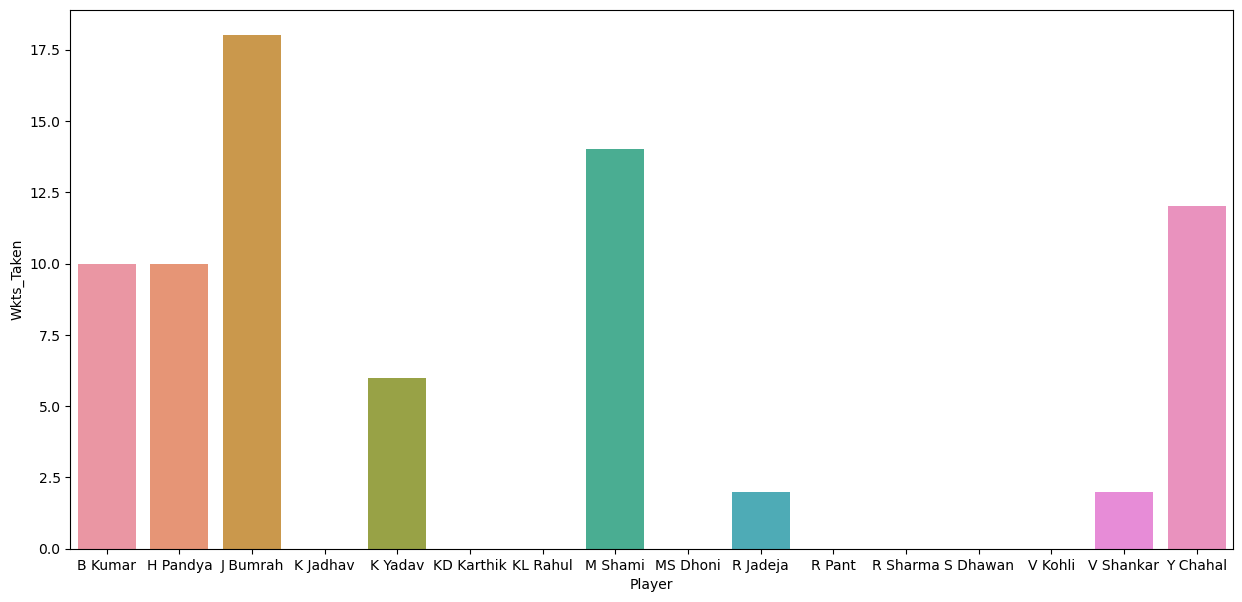

In [25]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='Wkts_Taken',data=dataset)

#### >> Jasprit Bumrah is the highest wicket taker. Followed by Mohammad Shami and Yuzvendra Chahal

### Players with 5 wicket haul

In [26]:
dataset[dataset['Wkt-5'] == dataset['Wkt-5'].max()]

,Player,Mat,Bat_Inn,Bowl_Inn,Not_Out,Runs,BF,HS,SR,100,...,4s,6s,O_Bowled,Wkts_Taken,Catches,Runs_Conceded,Bowl_Avg,Bat_Avg,Wkt-5,Maidens
7,M Shami,4,3,4.0,0,2,6,1,33.33,0.0,...,0,0,35.1,14.0,3.0,193.0,13.78,0.66,1.0,2.0


#### >> Only Mohammad Shami has a 5 wicket haul in the championship.

### Player-wise Bowling Average

<Axes: xlabel='Player', ylabel='Bowl_Avg'>

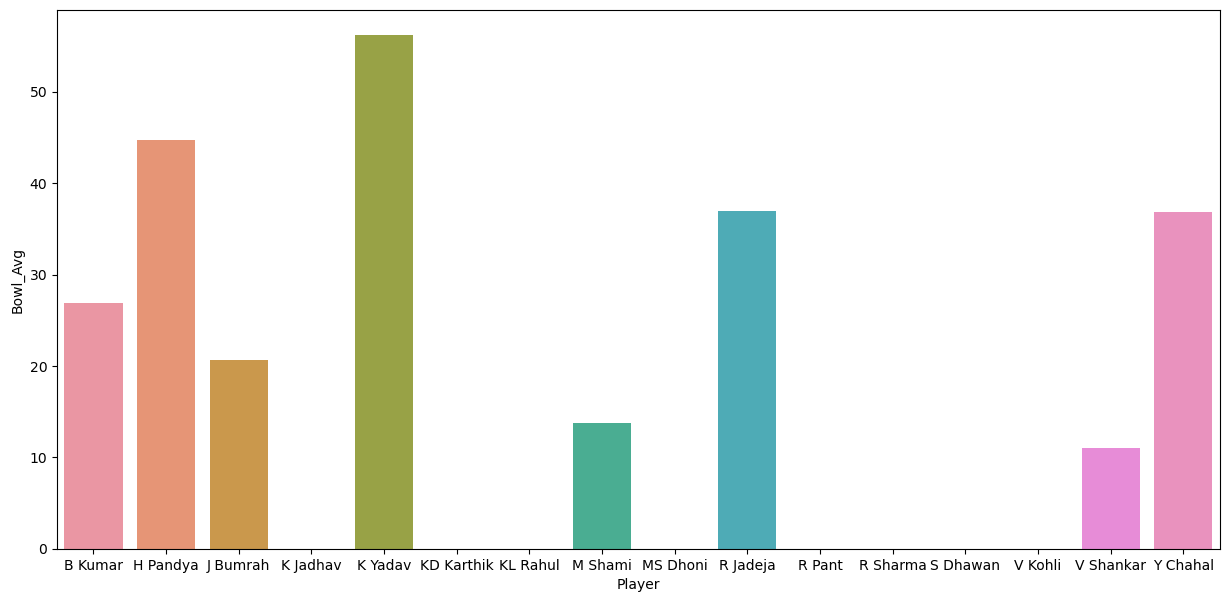

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='Bowl_Avg',data=dataset)

#### >>For Bowling average stands for the number of runs a bowler conceded before picking up a wicket. Hence, the lower average is preferred.
#### >>Hence Vijay Shankar has best bowling average whereas Kuldeep Yadav has a contrary.

### Maidens by a bowler

<Axes: xlabel='Player', ylabel='Maidens'>

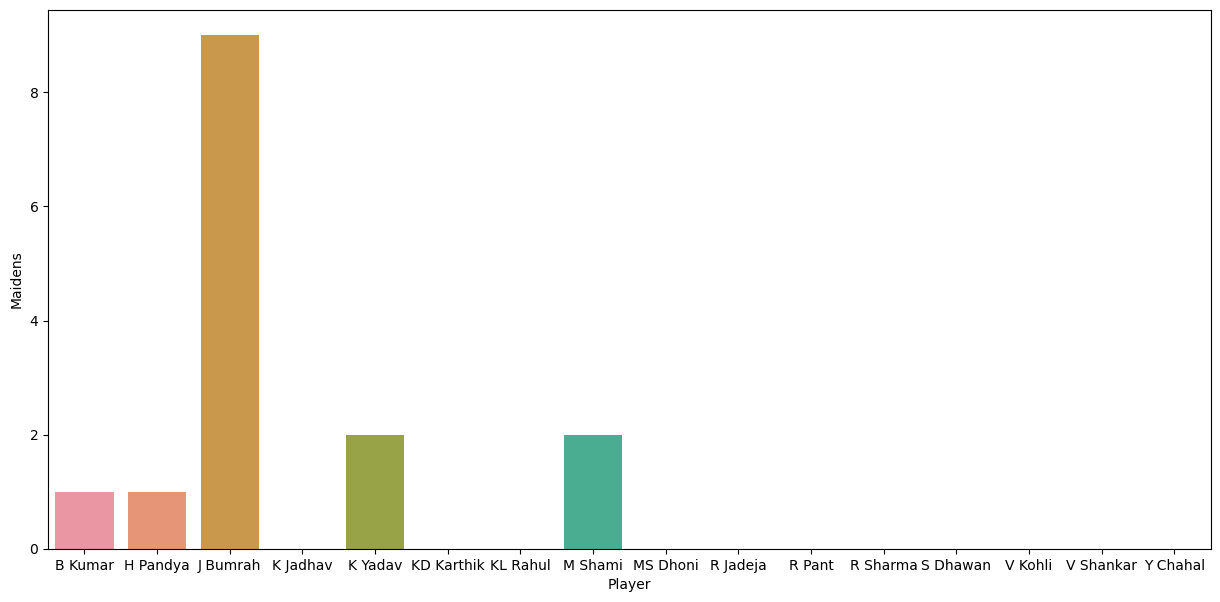

In [28]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='Maidens',data=dataset)

#### >> Jasprit Bumrah has most (9) maidens.

### Runs Conceded by a bowler

<Axes: xlabel='Player', ylabel='Runs_Conceded'>

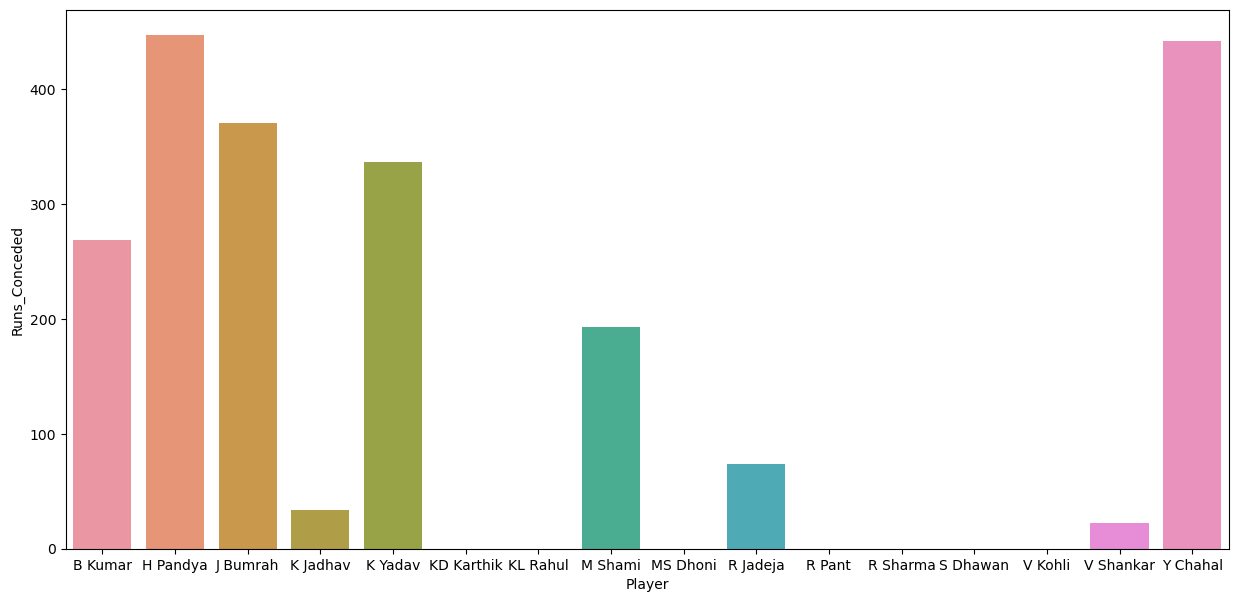

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='Runs_Conceded',data=dataset)

#### >> Hardik Pandya conceded most Runs (447)

### Bowling Overs

<Axes: xlabel='Player', ylabel='O_Bowled'>

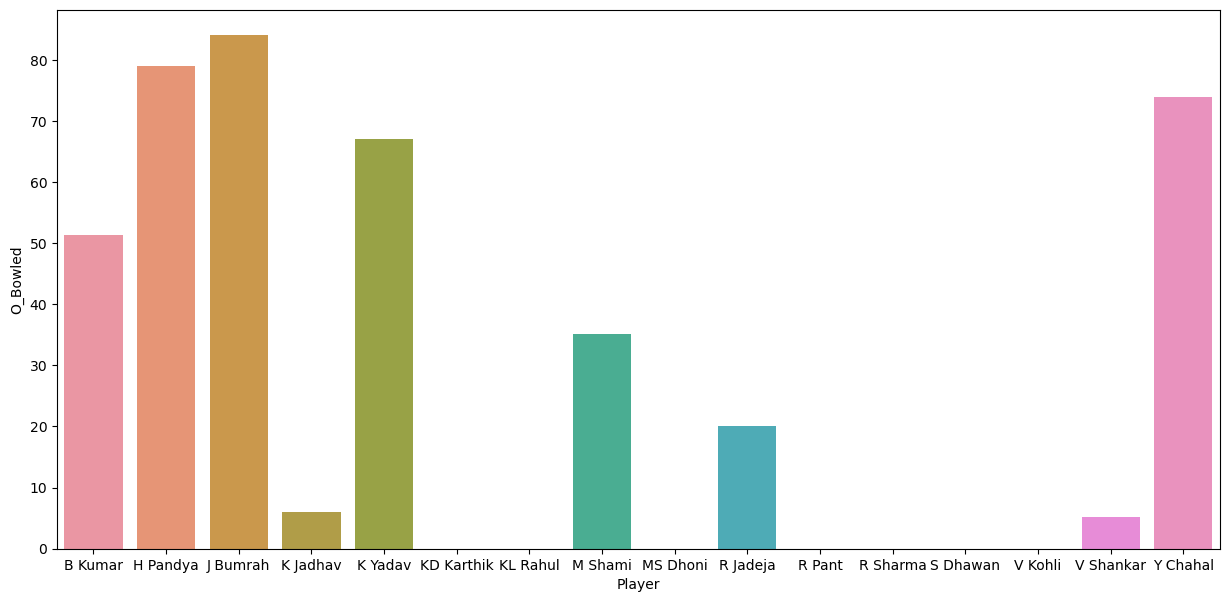

In [30]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='O_Bowled',data=dataset)

#### >> Jasprit Bumrah bowled the most Overs. Followed by Hardik Pandya and Yuzvendra Chahal

### *From Fielding perspective*

### Catches by Players

<Axes: xlabel='Player', ylabel='Catches'>

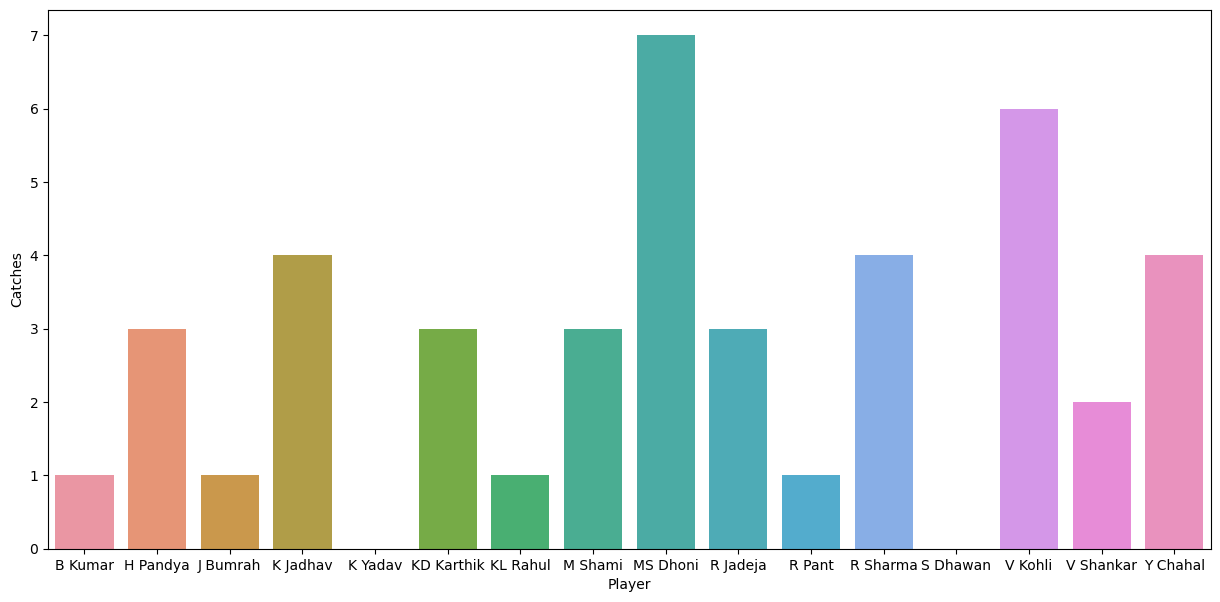

In [31]:
plt.figure(figsize=(15,7))
sns.barplot(x='Player',y='Catches',data=dataset)

#### >> MS Dhoni took most (7) catches. Followed by Virat Kohli with 6 catches in the championship.

## Data Preparation for Model Building

### Calculate Bowling Economy_Rate for each player

In [32]:
dataset['Economy_Rate'] =round((dataset['Runs_Conceded'] /dataset['O_Bowled']),2)
dataset=dataset.replace(np.nan,0)

In [33]:
dataset[['Player', 'Economy_Rate']]

,Player,Economy_Rate
0,B Kumar,5.23
1,H Pandya,5.66
2,J Bumrah,4.42
3,K Jadhav,5.67
4,K Yadav,5.03
5,KD Karthik,0.00
6,KL Rahul,0.00
7,M Shami,5.50
8,MS Dhoni,0.00
9,R Jadeja,3.70


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         16 non-null     object 
 1   Mat            16 non-null     int64  
 2   Bat_Inn        16 non-null     int64  
 3   Bowl_Inn       16 non-null     float64
 4   Not_Out        16 non-null     int64  
 5   Runs           16 non-null     int64  
 6   BF             16 non-null     int64  
 7   HS             16 non-null     object 
 8   SR             16 non-null     float64
 9   100            16 non-null     float64
 10  50             16 non-null     float64
 11  0              16 non-null     float64
 12  4s             16 non-null     int64  
 13  6s             16 non-null     int64  
 14  O_Bowled       16 non-null     float64
 15  Wkts_Taken     16 non-null     float64
 16  Catches        16 non-null     float64
 17  Runs_Conceded  16 non-null     float64
 18  Bowl_Avg    

In [35]:
dataset.drop(['Player','HS'],axis=1,inplace=True)

In [36]:
dataset.columns

Index(['Mat', 'Bat_Inn', 'Bowl_Inn', 'Not_Out', 'Runs', 'BF', 'SR', '100',
       '50', '0', '4s', '6s', 'O_Bowled', 'Wkts_Taken', 'Catches',
       'Runs_Conceded', 'Bowl_Avg', 'Bat_Avg', 'Wkt-5', 'Maidens',
       'Economy_Rate'],
      dtype='object')

## Model Building
#### 1. Logistic Regression Model
#### 2. Random Forest Classifier
#### 3. Gaussian Naive Bayes

# 

### *From Bowling Perspective*
#### Wickets taken by a player is an important criterion from the bowling perspective

In [37]:
x_bowl=dataset.drop("Wkts_Taken",axis=1)
y_bowl=dataset['Wkts_Taken']

In [38]:
x_bowl_train,x_bowl_test,y_bowl_train,y_bowl_test=train_test_split(x_bowl,y_bowl,test_size=0.3,random_state=45) #random state=42

### Logistic Regression Model

In [39]:
lgm=LogisticRegression()

In [40]:
lgm.fit(x_bowl_train,y_bowl_train)

LogisticRegression()

In [41]:
lgm.predict(x_bowl_test)

array([ 2.,  0.,  0., 12.,  0.])

In [42]:
score=round(lgm.score(x_bowl_train,y_bowl_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %


### Random Forest Classifier

In [43]:
rfc=RandomForestClassifier()

In [44]:
rfc.fit(x_bowl_train,y_bowl_train)

RandomForestClassifier()

In [45]:
rfc.predict(x_bowl_test)

array([0., 0., 0., 6., 0.])

In [46]:
score=round(rfc.score(x_bowl_train,y_bowl_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %


### Gaussian Naive Bayes

In [47]:
gnb=GaussianNB()

In [48]:
gnb.fit(x_bowl_train,y_bowl_train)

GaussianNB()

In [49]:
gnb.predict(x_bowl_test)

array([10.,  0.,  0., 10.,  0.])

In [50]:
score=round(gnb.score(x_bowl_train,y_bowl_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %


# 

### *From Batting Perspective*
#### Runs scored by player is an important criterion from the batting perspective

In [51]:
x_bat=dataset.drop("Runs",axis=1)
y_bat=dataset['Runs']

In [52]:
x_bat_train,x_bat_test,y_bat_train,y_bat_test=train_test_split(x_bat,y_bat,test_size=0.3,random_state=45)

### Logistic Regression Model

In [53]:
lgm=LogisticRegression()

In [54]:
lgm.fit(x_bat_train,y_bat_train)

LogisticRegression()

In [55]:
lgm.predict(x_bat_test)

array([ 58, 443, 443,   5,  14], dtype=int64)

In [56]:
score=round(lgm.score(x_bat_train,y_bat_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %


### Random Forest Classifier

In [57]:
rfc=RandomForestClassifier()

In [58]:
rfc.fit(x_bat_train,y_bat_train)

RandomForestClassifier()

In [59]:
rfc.predict(x_bat_test)

array([ 58, 443, 443,   1, 125], dtype=int64)

In [60]:
score=round(rfc.score(x_bat_train,y_bat_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %


### Gaussian Naive Bayes

In [61]:
gnb=GaussianNB()

In [62]:
gnb.fit(x_bat_train,y_bat_train)

GaussianNB()

In [63]:
gnb.predict(x_bat_test)

array([  2,   2, 443,   2,   2], dtype=int64)

In [64]:
score=round(gnb.score(x_bat_train,y_bat_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %


###  Conclusion:
#### >> The Visualisation of dataset gave us clear idea about the player's performance in World Cup 2019.
#### >> Also, the above models gave highest accuracy, for both bowling as well as batting perspectives.